In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 02: Getting Data

In [2]:
df = pd.read_csv("csv_files/marketing_customer_analysis.csv")
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 03: Cleaning / Wrangling / EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [3]:
df.columns=df.columns.str.lower() #change header names to lower case

In [4]:
df.columns = df.columns.map(lambda x: x.replace(" ","_")) #replace spaces 

In [5]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.info()  #exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [7]:
df.describe()  #exploration2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
df.isna().sum() #lets check for nan values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
drop_col = ["customer", "sales_channel", "number_of_open_complaints", "months_since_policy_inception"]
df = df.drop(columns=drop_col) #drop irrelevant cols

In [10]:
df_num = df.select_dtypes(include=np.number).head(5) #separation of num & cat data
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,1,384.811147
1,6979.535903,0,94,13,8,1131.464935
2,12887.431650,48767,108,18,2,566.472247
3,7645.861827,0,106,18,7,529.881344
4,2813.692575,43836,73,12,1,138.130879


In [11]:
df_cat = df.select_dtypes(include=np.object).head(5) #separation of num & cat data
df_cat

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Four-Door Car,Medsize


### 04: Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.


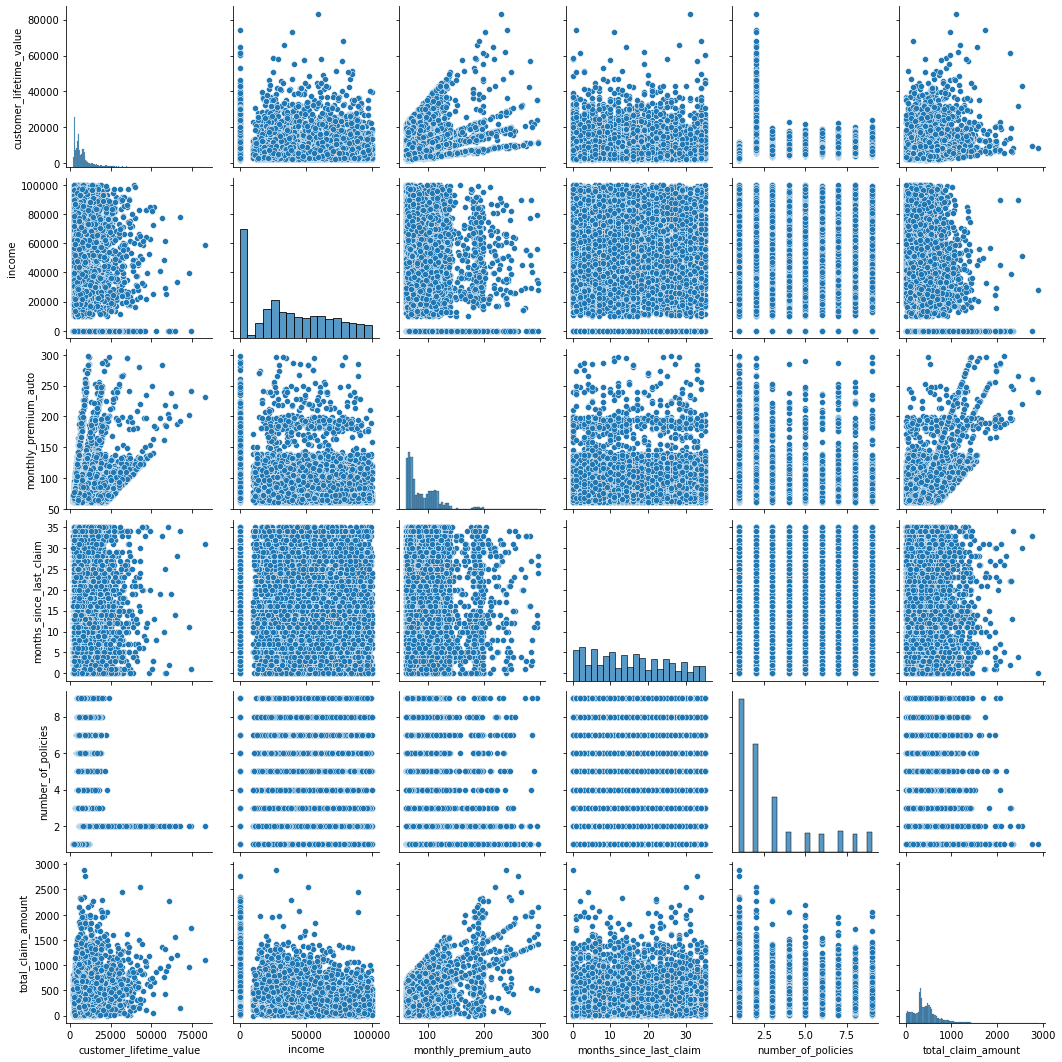

In [12]:
sns.pairplot(df)

In [13]:
df_corr = df.corr()
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,0.009136,0.007563
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,-0.002354,1.000000


In [14]:
#dealing with collinearity
correlation = df.corr() # pearson corr
mask = correlation > 0.8
correlation[mask]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,total_claim_amount
customer_lifetime_value,1.0,NaN,NaN,NaN,NaN,NaN
income,NaN,1.0,NaN,NaN,NaN,NaN
monthly_premium_auto,NaN,NaN,1.0,NaN,NaN,NaN
months_since_last_claim,NaN,NaN,NaN,1.0,NaN,NaN
number_of_policies,NaN,NaN,NaN,NaN,1.0,NaN
total_claim_amount,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
df_corr["total_claim_amount"].sort_values(ascending = False) #check for corr between our y (total claim amount) and features (x)

total_claim_amount         1.000000
monthly_premium_auto       0.632017
customer_lifetime_value    0.226451
months_since_last_claim    0.007563
number_of_policies        -0.002354
income                    -0.355254
Name: total_claim_amount, dtype: float64

#### Dealing with outliers

customer_lifetime_value


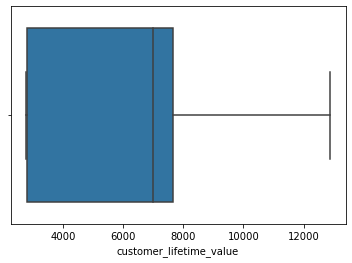

income


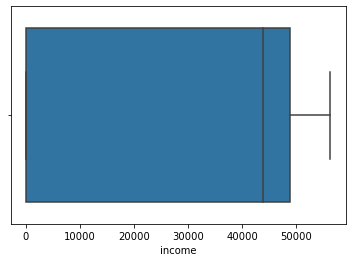

monthly_premium_auto


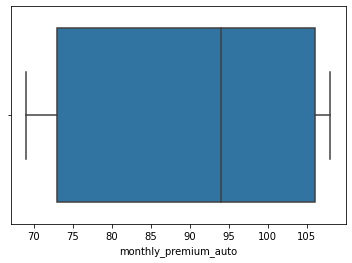

months_since_last_claim


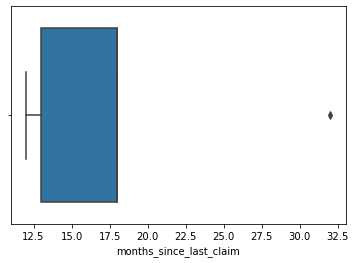

number_of_policies


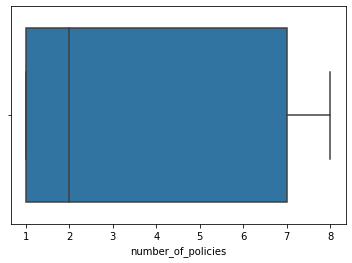

total_claim_amount


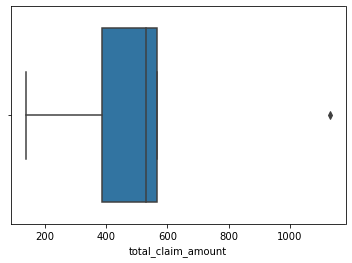

In [16]:
for item in df_num.columns: # show boxplot for all num cols
    print(item)
    sns.boxplot(x = df_num[item])
    plt.show()

In [17]:
#we will remove the remaining outliers in the next step

In [18]:
df_outliers = ["months_since_last_claim","total_claim_amount"] 

Q1 = df[df_outliers].quantile(0.25)
Q3 = df[df_outliers].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[df_outliers] < (Q1 - 1.5 * IQR)) |(df[df_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
df.describe() #double-checking if outliers have been removed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,total_claim_amount
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,7691.288196,38671.169105,89.033061,15.034904,2.958530,390.034963
std,6376.126782,30320.745669,27.095584,10.072207,2.383001,211.184004
min,1898.007675,0.000000,61.000000,0.000000,1.000000,0.099007
25%,3893.305281,12430.000000,68.000000,6.000000,1.000000,256.438030
50%,5635.746396,35205.000000,80.000000,14.000000,2.000000,364.800000
75%,8696.710700,63288.000000,106.000000,23.000000,4.000000,523.815839
max,67907.270500,99981.000000,296.000000,35.000000,9.000000,960.115399


#### Separating X and Y

In [20]:
#X = total_claim_amount
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_policies,policy_type,policy,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,1,Corporate Auto,Corporate L3,Offer1,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,2,Personal Auto,Personal L3,Offer1,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,7,Corporate Auto,Corporate L2,Offer1,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,1,Personal Auto,Personal L1,Offer1,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,2,Personal Auto,Personal L3,Offer2,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,2,Personal Auto,Personal L1,Offer2,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,1,Corporate Auto,Corporate L3,Offer1,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,2,Corporate Auto,Corporate L2,Offer1,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,Personal Auto,Personal L2,Offer3,691.200000,Four-Door Car,Large


In [21]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19]] #doublecheck
X.head(5)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_policies,policy_type,policy,renew_offer_type,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,1,Corporate Auto,Corporate L3,Offer1,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,2,Personal Auto,Personal L3,Offer1,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,7,Corporate Auto,Corporate L2,Offer1,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,1,Personal Auto,Personal L1,Offer1,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,2,Personal Auto,Personal L3,Offer2,Two-Door Car,Medsize


In [22]:
y = df.iloc[:,-3] #doublecheck
y.head(5)

0    384.811147
2    566.472247
3    529.881344
4    138.130879
5    159.383042
Name: total_claim_amount, dtype: float64

#### Encode categorical data

In [23]:
X = pd.get_dummies(X, drop_first = True) # dummification

In [24]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,12887.431650,48767,108,18,2,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,7,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,8256.297800,62902,69,14,2,0,0,1,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Split into train-test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 

In [26]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
7163,2879.505701,42247,74,4,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2420,7224.235434,0,72,27,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8362,2889.087654,72075,73,32,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
32,4715.321344,0,65,19,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7370,7326.544855,62338,92,9,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,7431.664369,27688,92,8,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8299,7756.174223,21326,99,22,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5111,5862.803295,75121,73,12,6,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3418,10484.915350,61108,89,22,2,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [27]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2526,18380.390260,50407,92,30,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8894,7330.190221,26906,92,17,3,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
7009,10719.084670,86036,90,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8932,6570.970605,52951,167,3,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8034,8571.480718,56202,107,19,8,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,12731.951610,40870,105,3,2,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7241,2803.596080,60707,70,2,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5834,4328.373176,72531,109,35,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2597,2347.048112,31617,62,17,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 05: Modeling


#### Standardize data

In [28]:
from sklearn.preprocessing import StandardScaler

num_transformer = StandardScaler()

In [29]:
X_train = num_transformer.fit_transform(X_train) 
X_test = num_transformer.transform(X_test)       

#### Train the model

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### 06 - Model Validation
- R2
- MSE
- RMSE
- MAE


In [31]:
y_train_pred = regressor.predict(X_train) # predictions for our train data
y_test_pred = regressor.predict(X_test)   # predictions for our test data

In [32]:
#R2

from sklearn.metrics import r2_score

r2_train = regressor.score(X_train, y_train) # calculate r2 score for train data
r2_test = regressor.score(X_test, y_test)    # calculate r2 score for test data

print('R2 value for train: {}'.format(r2_train))
print('R2 value for test: {}'.format(r2_test)) 

R2 value for train: 0.7898784395669411
R2 value for test: 0.780837205116068


In [33]:
#MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)

9442.702276229982

In [34]:
#RMSE

rmse_train = mean_squared_error(y_train,y_train_pred,squared = False)
rmse_train

97.17356778584382

In [35]:
rmse_test = mean_squared_error(y_test,y_test_pred,squared = False)
rmse_test

97.3154427300247

In [36]:
#MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_train_pred)

74.64056699238515

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_test_pred)

74.1195493724352

### 07:  Reporting

- Present results

In [46]:
X = y_train_pred            
y = y_train
t = np.arange(0,X.size)              

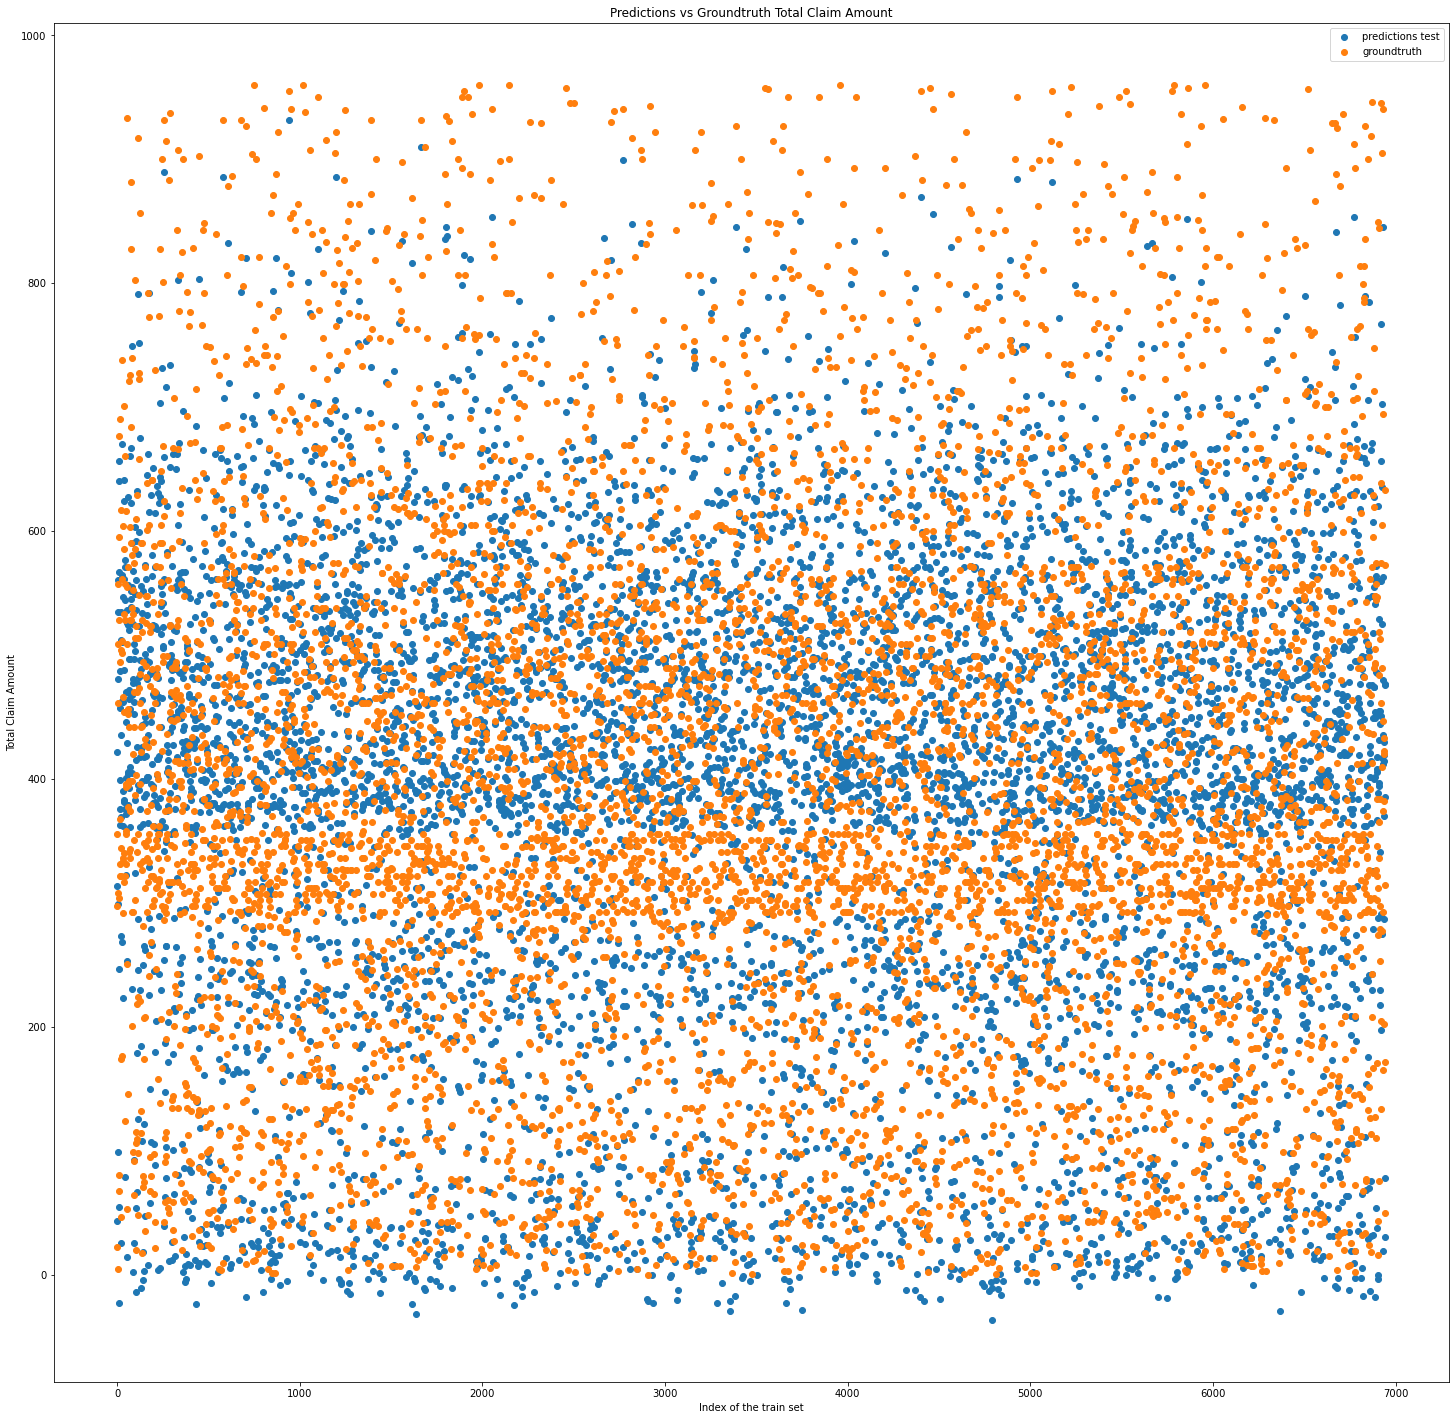

In [47]:
# Create the figure and axes object
fig, ax = plt.subplots(figsize=(25,25))

plt.scatter(t,X) 
plt.scatter(t,y)

# Add Title
plt.title("Predictions vs Groundtruth Total Claim Amount") 

# Add Axes Labels
plt.xlabel("Index of the train set") 
plt.ylabel("Total Claim Amount") 


# Function add a legend  
plt.legend(["predictions test", "groundtruth"], loc ="upper right")

# Display
plt.show()